n_dot 1

Fixed mu solver
mu_d [0.1]
estimate no of electrons on dot (simple solver) [ 0.83535961]
estimate no of electrons on dot (iterative) [ 0.83535961]

Fixed N solver
N_d [3]

simple(non iter) : dot potential [ 0.26908278]

simple : dot potential [ 0.26908278]
{'l1': (86, 99), 'num_dot': 1, 'l0': (0, 13), 'b1': (55, 85), 'b0': (14, 44), 'd0': (45, 54)}

simple iter : dot potential [ 0.22366464]
{'l1': (86, 99), 'num_dot': 1, 'l0': (0, 13), 'b1': (60, 85), 'b0': (14, 39), 'd0': (40, 59)}

opt : dot potential [ 0.21917633]
{'l1': (86, 99), 'num_dot': 1, 'l0': (0, 13), 'b1': (60, 85), 'b0': (14, 39), 'd0': (40, 59)}
opt_iter : dot potential [ 0.21917633]
{'l1': (86, 99), 'num_dot': 1, 'l0': (0, 13), 'b1': (60, 85), 'b0': (14, 39), 'd0': (40, 59)}


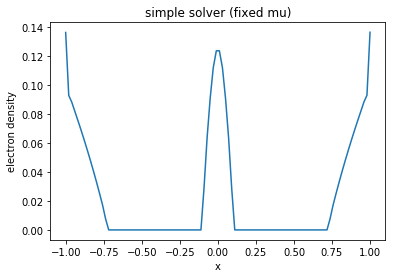

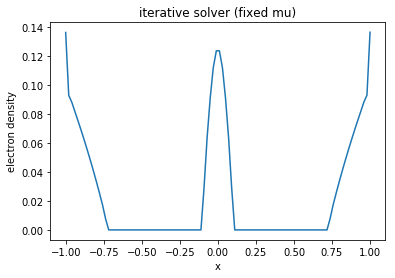

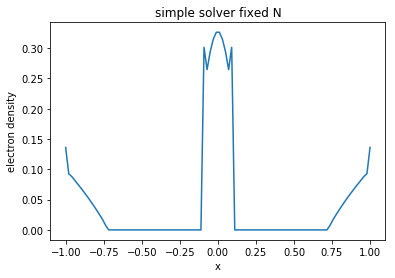

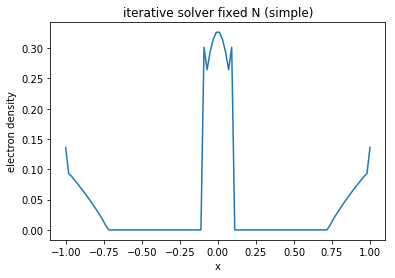

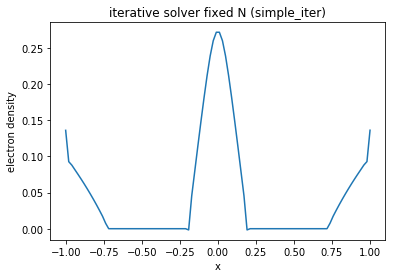

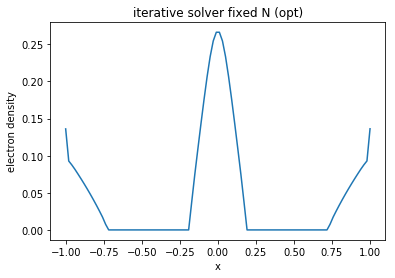

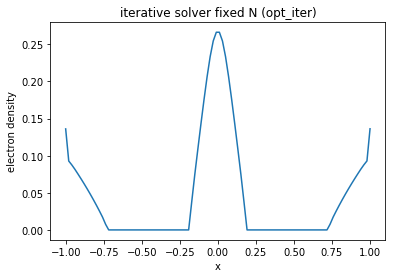

In [146]:
# Testnotebook for the Thomas Fermi module
# All TF solvers can be tested. Exceptions should be handled automatically.

import numpy as np
import imp
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.expanduser('~/quantum-ml/nanowire_model'))

import thomas_fermi
imp.reload(thomas_fermi)
import mask
imp.reload(mask)
import potential_profile
import exceptions

E_scale = 'eV'
dx_scale = '1e-9'

kT = 400e-6
b1 = (-200e-3,-0.3,0.1,1)
d = (200e-3,0.0,0.1,1)
b2 = (-200e-3,0.3,0.1,1)

x = np.linspace(-1,1,100)
V = potential_profile.V_x_wire(x,[b1,d,b2])

K_onsite = 10e-3
sigma = x[1] - x[0]
x_0 = 1*(x[1] - x[0])
mu_l = (100.0e-3,100.1e-3)
battery_weight = 100

model_physics = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)

my_tf = thomas_fermi.ThomasFermi(model_physics)
print("n_dot",my_tf.find_n_dot_estimate())

mu_d = [mu_l[0]]*my_tf.mask.mask_info['num_dot']

# testing the fixed mu solvers
print("\nFixed mu solver")
print("mu_d",mu_d)
n,N_d = my_tf.tf_solver_fixed_mu(mu_d)
plt.figure(1)
plt.plot(x,n)
plt.title("simple solver (fixed mu)")
plt.xlabel('x')
plt.ylabel('electron density')
print("estimate no of electrons on dot (simple solver)",N_d)

n,N_d = my_tf.tf_iterative_solver_fixed_mu(mu_d)
plt.figure(2)
plt.plot(x,n)
plt.title("iterative solver (fixed mu)")
plt.xlabel('x')
plt.ylabel('electron density')
print("estimate no of electrons on dot (iterative)",N_d)

print("\nFixed N solver")
# testing the fixed N solvers
N_d = [3]
print("N_d",N_d)
n,mu_d = my_tf.tf_solver_fixed_N(N_d)
plt.figure(3)
plt.plot(x,n)
plt.title("simple solver fixed N")
plt.xlabel('x')
plt.ylabel('electron density')
print("\nsimple(non iter) : dot potential",mu_d)

n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_d,strategy="simple")
plt.figure(4)
plt.plot(x,n)
plt.title("iterative solver fixed N (simple)")
plt.xlabel('x')
plt.ylabel('electron density')
print("\nsimple : dot potential",mu_d)
print(my_tf.mask.mask_info)

try:
    n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_d,strategy="simple_iter")
    plt.figure(5)
    plt.plot(x,n)
    plt.title("iterative solver fixed N (simple_iter)")
    plt.xlabel('x')
    plt.ylabel('electron density')
    print("\nsimple iter : dot potential",mu_d)
    print(my_tf.mask.mask_info)
except exceptions.InvalidChargeState:
    n = []
    mu_d = []
    print("\nsimple iter : Invalid charge state.")
    
n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_d,strategy="opt")
plt.figure(6)
plt.plot(x,n)
plt.title("iterative solver fixed N (opt)")
plt.xlabel('x')
plt.ylabel('electron density')
print("\nopt : dot potential",mu_d)
print(my_tf.mask.mask_info)

try:
    n,mu_d = my_tf.tf_iterative_solver_fixed_N(N_d,strategy="opt_iter")
    plt.figure(7)
    plt.plot(x,n)
    plt.title("iterative solver fixed N (opt_iter)")
    plt.xlabel('x')
    plt.ylabel('electron density')
    print("opt_iter : dot potential",mu_d)
    print(my_tf.mask.mask_info)
except exceptions.InvalidChargeState:
    n = []
    mu_d = []
    print("\nopt iter : Invalid charge state.")


#N_calc = my_tf.calculate_N_d_from_n(n) 
#print("Number of electron on dot from n",N_d)

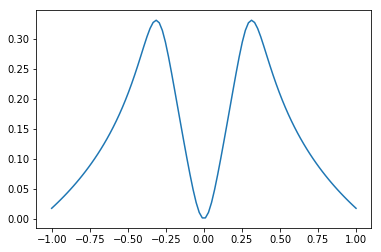

In [136]:
plt.plot(x,V)

In [44]:
my_tf.K


array([[ 0.495,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.495,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.495, ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [ 0.   ,  0.   ,  0.   , ...,  0.495,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.495,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.495]])